In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [ ]:
# 시간대 가장 이용자가 많은 역...

In [8]:
df = pd.read_csv('./eda_data_files/subwaytime.csv', encoding='euckr')
df.head(2)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0


In [ ]:
# 오전 7시부터 9사이 승차인원이 가장 많은 역, 하차 인원이 가장 많은 역?

In [9]:
df.drop(['사용월', '역ID'], axis=1, inplace=True)

In [10]:
df.head()

,호선명,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,승차,하차,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,1호선,서울역,927,22,10682,8774,13504,45545,39110,103863,...,33149,19442,3612,7167,0,410,0,0,0,0
2,1호선,시청,74,0,2409,4049,3532,19241,7703,66876,...,14478,4079,981,1256,3,29,0,0,0,0
3,1호선,종각,100,8,4409,5105,4593,26969,6733,104259,...,54264,5560,4886,1722,0,0,0,0,0,0
4,1호선,종로3가,122,4,5061,2520,3876,12832,6066,29381,...,25970,5503,3214,2471,0,52,0,0,0,0


In [17]:
temp_list = []
for i in range(24):
    for j in ['승', '하']:
        temp_list.append(j+str(i))
temp_list

['승0',
 '하0',
 '승1',
 '하1',
 '승2',
 '하2',
 '승3',
 '하3',
 '승4',
 '하4',
 '승5',
 '하5',
 '승6',
 '하6',
 '승7',
 '하7',
 '승8',
 '하8',
 '승9',
 '하9',
 '승10',
 '하10',
 '승11',
 '하11',
 '승12',
 '하12',
 '승13',
 '하13',
 '승14',
 '하14',
 '승15',
 '하15',
 '승16',
 '하16',
 '승17',
 '하17',
 '승18',
 '하18',
 '승19',
 '하19',
 '승20',
 '하20',
 '승21',
 '하21',
 '승22',
 '하22',
 '승23',
 '하23']

In [18]:
temp_list = temp_list+temp_list[:8]

In [22]:
temp_list  = temp_list[8:]

In [24]:
temp_list = ['호선명', '지하철역'] + temp_list
temp_list

['호선명',
 '지하철역',
 '승4',
 '하4',
 '승5',
 '하5',
 '승6',
 '하6',
 '승7',
 '하7',
 '승8',
 '하8',
 '승9',
 '하9',
 '승10',
 '하10',
 '승11',
 '하11',
 '승12',
 '하12',
 '승13',
 '하13',
 '승14',
 '하14',
 '승15',
 '하15',
 '승16',
 '하16',
 '승17',
 '하17',
 '승18',
 '하18',
 '승19',
 '하19',
 '승20',
 '하20',
 '승21',
 '하21',
 '승22',
 '하22',
 '승23',
 '하23',
 '승0',
 '하0',
 '승1',
 '하1',
 '승2',
 '하2',
 '승3',
 '하3']

In [25]:
df.columns = temp_list

In [27]:
df.drop(0, inplace=True)

In [28]:
df.head()

,호선명,지하철역,승4,하4,승5,하5,승6,하6,승7,하7,...,승23,하23,승0,하0,승1,하1,승2,하2,승3,하3
1,1호선,서울역,927,22,10682,8774,13504,45545,39110,103863,...,33149,19442,3612,7167,0,410,0,0,0,0
2,1호선,시청,74,0,2409,4049,3532,19241,7703,66876,...,14478,4079,981,1256,3,29,0,0,0,0
3,1호선,종각,100,8,4409,5105,4593,26969,6733,104259,...,54264,5560,4886,1722,0,0,0,0,0,0
4,1호선,종로3가,122,4,5061,2520,3876,12832,6066,29381,...,25970,5503,3214,2471,0,52,0,0,0,0
5,1호선,종로5가,43,2,1934,3590,2935,14991,5143,40376,...,12013,3450,785,980,1,3,0,0,0,0


In [30]:
df.set_index('지하철역', inplace=True)

In [35]:
df.loc[:, '승7':'승9':2].sum(axis=1).sort_values(ascending=False)[:5]

지하철역
신림             2.430834e+17
구로디지털단지        1.546412e+17
신도림            1.531332e+17
연신내            1.487412e+17
서울대입구(관악구청)    1.461812e+17
dtype: float64

In [37]:
df.loc[:, '하7':'하9':2].sum(axis=1).sort_values(ascending=False)[:5]

지하철역
강남          1.845884e+17
역삼          1.351964e+17
을지로입구       1.279834e+17
삼성(무역센터)    1.274934e+17
선릉          1.116223e+17
dtype: float64

In [38]:
# 출근시간대 하차인원을 역별로 bar chart로 나타내시오

<AxesSubplot:xlabel='지하철역'>

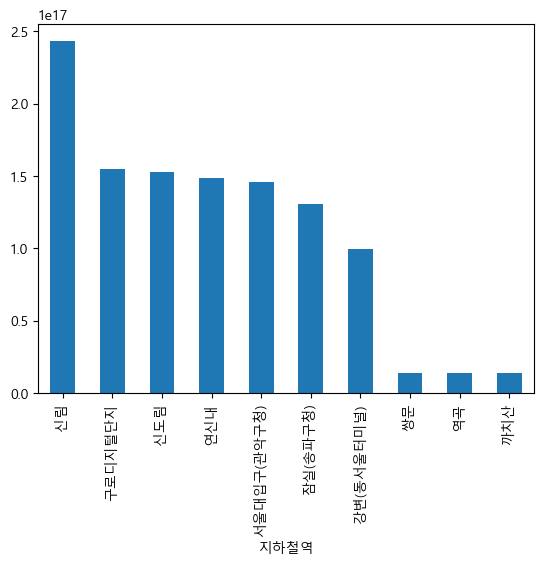

In [42]:
df.loc[:, '승7':'승9':2].sum(axis=1).sort_values(ascending=False)[:10].plot(kind='bar')

In [44]:
# 시간대별 지하철 전체 이용자 수를 bar chart로 나타내시오..

In [48]:
df_t = df.T

In [51]:
df_t['time'] = df_t.index

In [74]:
df_t['hour'] = df_t.time.apply(lambda x: x[1:])

In [75]:
df_t

지하철역,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리(서울시립대입구),동묘앞,...,삼양사거리,솔샘,북한산보국문,정릉,성신여대입구(돈암),보문,신설동,time,hour,total_pop
승4,927.0,74.0,100.0,122.0,43.0,621.0,287.0,316.0,1321.0,93.0,...,12.0,0.0,5.0,3.0,2.0,0.0,17.0,승4,4,105055.0
하4,22.0,0.0,8.0,4.0,2.0,7.0,18.0,8.0,11.0,3.0,...,8.0,2.0,3.0,0.0,0.0,0.0,1.0,하4,4,1616.0
승5,10682.0,2409.0,4409.0,5061.0,1934.0,15328.0,8847.0,4874.0,10844.0,3326.0,...,1275.0,2408.0,1907.0,1508.0,769.0,407.0,574.0,승5,5,3004777.0
하5,8774.0,4049.0,5105.0,2520.0,3590.0,2164.0,2242.0,2284.0,2912.0,832.0,...,231.0,307.0,561.0,625.0,281.0,190.0,725.0,하5,5,769865.0
승6,13504.0,3532.0,4593.0,3876.0,2935.0,10315.0,9805.0,8388.0,16911.0,3418.0,...,2317.0,8456.0,6026.0,4799.0,1172.0,770.0,737.0,승6,6,6109712.0
하6,45545.0,19241.0,26969.0,12832.0,14991.0,6673.0,8507.0,8242.0,12013.0,3433.0,...,942.0,1114.0,2270.0,1809.0,931.0,928.0,1630.0,하6,6,4063753.0
승7,39110.0,7703.0,6733.0,6066.0,5143.0,14893.0,20077.0,22615.0,46015.0,6088.0,...,6395.0,27463.0,20034.0,12345.0,3373.0,1868.0,1098.0,승7,7,16485348.0
하7,103863.0,66876.0,104259.0,29381.0,40376.0,12227.0,23708.0,18537.0,20676.0,8945.0,...,1449.0,1739.0,3613.0,2999.0,3424.0,2159.0,4173.0,하7,7,9027520.0
승8,80492.0,9978.0,11028.0,9735.0,8509.0,24080.0,30505.0,34862.0,65427.0,9415.0,...,8568.0,29888.0,23966.0,14421.0,6730.0,3949.0,2075.0,승8,8,19843950.0
하8,236747.0,209349.0,300081.0,84155.0,132808.0,27692.0,77052.0,50424.0,42910.0,22873.0,...,4083.0,3840.0,7142.0,5144.0,8021.0,5117.0,13895.0,하8,8,23309313.0


In [76]:
df_t.hour

승4      4
하4      4
승5      5
하5      5
승6      6
하6      6
승7      7
하7      7
승8      8
하8      8
승9      9
하9      9
승10    10
하10    10
승11    11
하11    11
승12    12
하12    12
승13    13
하13    13
승14    14
하14    14
승15    15
하15    15
승16    16
하16    16
승17    17
하17    17
승18    18
하18    18
승19    19
하19    19
승20    20
하20    20
승21    21
하21    21
승22    22
하22    22
승23    23
하23    23
승0      0
하0      0
승1      1
하1      1
승2      2
하2      2
승3      3
하3      3
Name: hour, dtype: object

In [77]:
df_t.drop('호선명', inplace=True)

KeyError: "['호선명'] not found in axis"

In [78]:
for c in df_t.columns[:-2]:
    df_t[c] = df_t[c].astype('float')

ValueError: could not convert string to float: '승4'

In [79]:
df_t['total_pop'] = df_t.iloc[:, :-2].sum(axis=1)

C:\TempFolder\ipykernel_6168\3201697037.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_t['total_pop'] = df_t.iloc[:, :-2].sum(axis=1)


In [80]:
df_t.head()

지하철역,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리(서울시립대입구),동묘앞,...,삼양사거리,솔샘,북한산보국문,정릉,성신여대입구(돈암),보문,신설동,time,hour,total_pop
승4,927.0,74.0,100.0,122.0,43.0,621.0,287.0,316.0,1321.0,93.0,...,12.0,0.0,5.0,3.0,2.0,0.0,17.0,승4,4,105055.0
하4,22.0,0.0,8.0,4.0,2.0,7.0,18.0,8.0,11.0,3.0,...,8.0,2.0,3.0,0.0,0.0,0.0,1.0,하4,4,1616.0
승5,10682.0,2409.0,4409.0,5061.0,1934.0,15328.0,8847.0,4874.0,10844.0,3326.0,...,1275.0,2408.0,1907.0,1508.0,769.0,407.0,574.0,승5,5,3004777.0
하5,8774.0,4049.0,5105.0,2520.0,3590.0,2164.0,2242.0,2284.0,2912.0,832.0,...,231.0,307.0,561.0,625.0,281.0,190.0,725.0,하5,5,769865.0
승6,13504.0,3532.0,4593.0,3876.0,2935.0,10315.0,9805.0,8388.0,16911.0,3418.0,...,2317.0,8456.0,6026.0,4799.0,1172.0,770.0,737.0,승6,6,6109712.0


<AxesSubplot:xlabel='hour'>

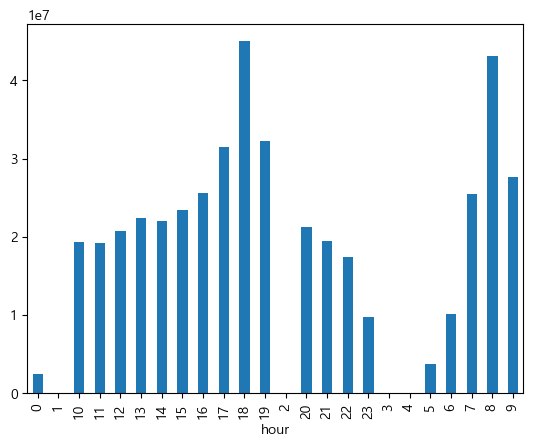

In [85]:
df_t.groupby('hour')['total_pop'].sum().plot(kind='bar')